In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [92]:
df = pd.read_csv(r'C:\Users\Downloads\laptop.csv',sep=',')

In [93]:
df.head(5)

,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹50,399",70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty
1,1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty
2,2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,"₹26,989",55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,"₹69,990",60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
4,4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Model       920 non-null    object 
 2   Price       920 non-null    object 
 3   Rating      768 non-null    float64
 4   Generation  920 non-null    object 
 5   Core        920 non-null    object 
 6   Ram         920 non-null    object 
 7   SSD         920 non-null    object 
 8   Display     919 non-null    object 
 9   Graphics    920 non-null    object 
 10  OS          919 non-null    object 
 11  Warranty    915 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 86.4+ KB


In [95]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [96]:
df.rename(columns={'Generation':'CPU', 'Core':'Cores'},inplace=True)

In [97]:
df.shape

(920, 11)

In [98]:
df.describe(include='all')

,Model,Price,Rating,CPU,Cores,Ram,SSD,Display,Graphics,OS,Warranty
count,920,920,768.000000,920,920,920,920,919,920,919,915
unique,920,498,NaN,176,40,56,18,88,145,16,8
top,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹69,990",NaN,12th Gen Intel Core i5 1235U,"10 Cores (2P + 8E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
freq,1,17,NaN,48,140,225,619,394,82,835,806
mean,NaN,NaN,61.756510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7.114217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,61.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df['Price']=df['Price'].str.replace('₹','').str.replace(',','')

In [100]:
#Переведем рупи в доллары для более удобного расчета
usd_exchange_rate = 85
df['Price']=df['Price'].astype(float)
df['Price']=(df['Price']/usd_exchange_rate).round()

In [101]:
df.head()

,Model,Price,Rating,CPU,Cores,Ram,SSD,Display,Graphics,OS,Warranty
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,593.0,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,282.0,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,318.0,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,823.0,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1212.0,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty


In [102]:
df.duplicated().sum()

0

In [103]:
df.isnull().sum()

Model         0
Price         0
Rating      152
CPU           0
Cores         0
Ram           0
SSD           0
Display       1
Graphics      0
OS            1
Warranty      5
dtype: int64

In [104]:
#Заполним пропуски в рейтинге средним
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [105]:
df.isnull().sum()

Model       0
Price       0
Rating      0
CPU         0
Cores       0
Ram         0
SSD         0
Display     1
Graphics    0
OS          1
Warranty    5
dtype: int64

In [106]:
df['OS'] = df['OS'].fillna("Unknown")
df['Display'] = df['Display'].fillna("Unknown")
df['Warranty'] = df['Warranty'].fillna("Unknown")

In [107]:
df.isnull().sum()

Model       0
Price       0
Rating      0
CPU         0
Cores       0
Ram         0
SSD         0
Display     0
Graphics    0
OS          0
Warranty    0
dtype: int64

In [108]:
#Удалим строки с неправильной информацией
df = df[df['OS'] != 'Backlit Keyboard']
df = df[df['OS'] != '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels']
df = df[df['OS'] != '1 Year Warranty']
df = df[df['OS'] != '2 Year Warranty']
df = df[df['OS'] != 'Intel Iris Xe Graphics']
df = df[df['Ram']!='64 GB Hard Disk']
df = df[df['Warranty'] != 'Backlit Keyboard']
df = df[df['Warranty'] != '1 USB 3.0 Ports']

In [109]:
df.head()

,Model,Price,Rating,CPU,Cores,Ram,SSD,Display,Graphics,OS,Warranty
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,593.0,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,282.0,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,318.0,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,823.0,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1212.0,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty


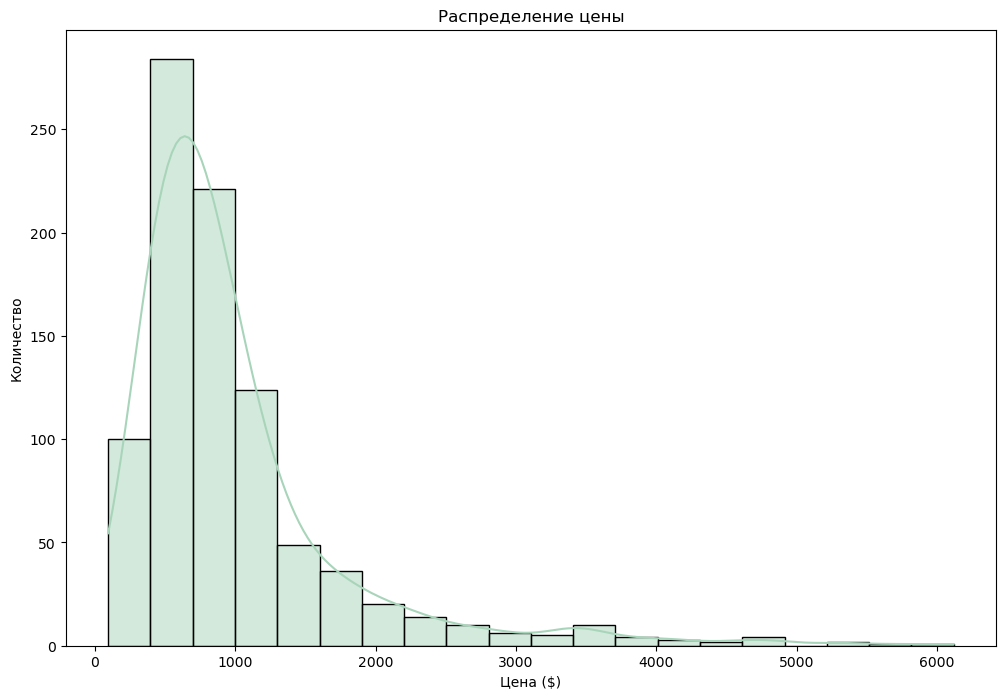

In [208]:
#Распределение цен
plt.figure(figsize=(12,8))
plt.title('Распределение цены')
sns.histplot(df['Price'],bins=20,kde=True,color='#A8D5BA')
plt.xlabel('Цена ($)')
plt.ylabel('Количество')
plt.show()

In [111]:
#Создадим колонку с фирмами ноутбуков
df['Brand'] = df['Model'].str.split().str[0]

In [112]:
df.head()

,Model,Price,Rating,CPU,Cores,Ram,SSD,Display,Graphics,OS,Warranty,Brand
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,593.0,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,HP
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,282.0,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,Tecno
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,318.0,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,Lenovo
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,823.0,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,Samsung
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1212.0,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,Xiaomi


In [113]:
df['Brand'].value_counts()

Brand
Lenovo       211
HP           175
Asus         132
Dell          95
MSI           91
Acer          70
Samsung       21
Infinix       20
Apple         18
Chuwi          8
LG             7
Zebronics      7
Xiaomi         6
Ultimus        5
Gigabyte       4
Wings          4
Avita          4
Honor          3
Fujitsu        3
Microsoft      2
AXL            2
iBall          1
Walker         1
Tecno          1
Huawei         1
Colorful       1
‎HP            1
Ninkear        1
Razer          1
Name: count, dtype: int64

In [114]:
#Топ 10 брендов по количеству моделей
top_brands = df['Brand'].value_counts().reset_index().sort_values(by='count',ascending=False).head(10)

In [115]:
top_brands

,Brand,count
0,Lenovo,211
1,HP,175
2,Asus,132
3,Dell,95
4,MSI,91
5,Acer,70
6,Samsung,21
7,Infinix,20
8,Apple,18
9,Chuwi,8


In [116]:
# Считаем количество ноутбуков по бренду
brands_counts = df['Brand'].value_counts().reset_index()
# Считаем среднюю цену по бренду
avg_price = df.groupby('Brand')['Price'].mean().reset_index()
# Объединяем обе таблицы
top_brands = pd.merge(brands_counts,avg_price, on='Brand')
# Берём топ-10 по количеству
top_brands = top_brands.sort_values(by='count', ascending=False).head(10)
# Округлим среднюю цену
top_brands['Price'] = top_brands['Price'].round(2)

In [117]:
top_brands

,Brand,count,Price
0,Lenovo,211,854.91
1,HP,175,1078.59
2,Asus,132,820.42
3,Dell,95,1144.22
4,MSI,91,1496.97
5,Acer,70,683.40
6,Samsung,21,1374.05
7,Infinix,20,482.25
8,Apple,18,2230.39
9,Chuwi,8,327.75


In [118]:
top_brands = df['Brand'].value_counts().head(10).index
df_top = df[df['Brand'].isin(top_brands)]

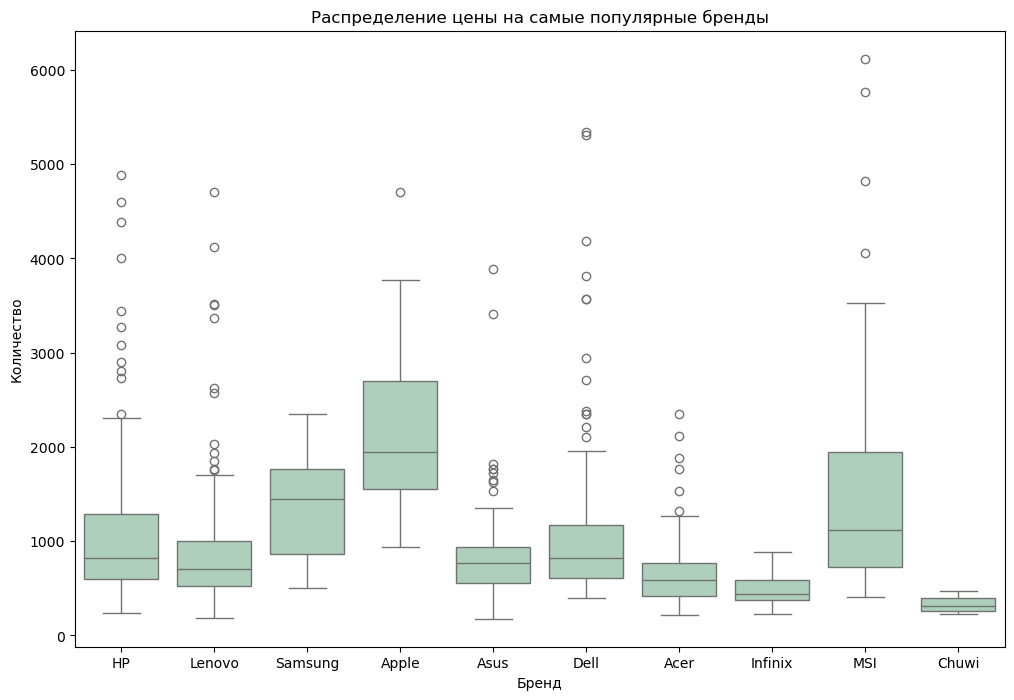

In [209]:
#Распределение цен на самые популярный бренды
plt.figure(figsize=(12,8))
plt.title('Распределение цены на самые популярные бренды')
sns.boxplot(data=df_top,x='Brand',y='Price',color='#A8D5BA')
plt.xlabel('Бренд')
plt.ylabel('Количество')
plt.show()

In [120]:
#Топ брендов по рейтингу
rating = df.groupby('Brand')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False)

In [121]:
rating

,Brand,Rating
18,Ninkear,73.000000
28,‎HP,70.000000
6,Colorful,70.000000
14,LG,68.857143
12,Huawei,68.000000
9,Gigabyte,67.250000
16,MSI,65.462969
8,Fujitsu,64.000000
10,HP,63.338036
3,Asus,62.330236


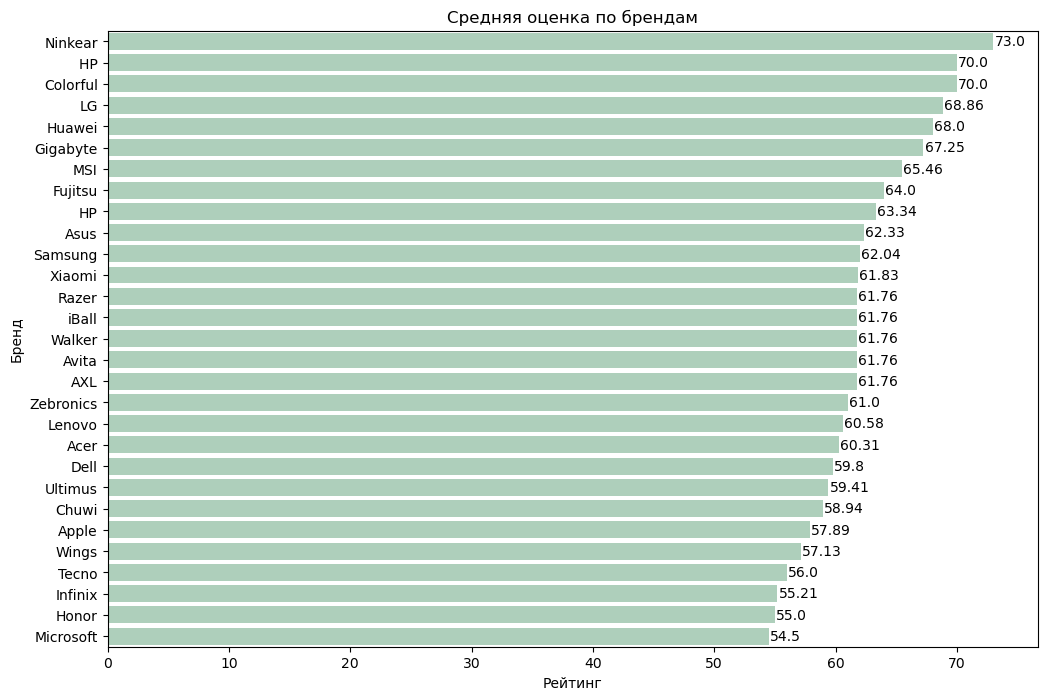

In [122]:
#Средняя оценка по брендам
plt.figure(figsize=(12,8))
plt.title('Средняя оценка по брендам')
sns.barplot(data=rating,x='Rating',y='Brand',color='#A8D5BA')
for index, value in enumerate(rating['Rating'].round(2)):
    plt.text(value+0.1,index,str(value),va='center')
plt.xlabel('Рейтинг')
plt.ylabel('Бренд')
plt.show()

In [123]:
#Приведем в порядок колонку 'OS'
df['OS']=df['OS'].replace('Windows 10  OS','Windows 10 OS')
df['OS']=df['OS'].replace('Windows 11  OS','Windows 11 OS')
df['OS']=df['OS'].replace('Windows OS','Windows 11 OS')
df['OS']=df['OS'].replace('Windows 11 Pro OS','Windows 11 OS')
df['OS']=df['OS'].replace('DOS 3.0 OS','DOS OS')

In [124]:
df['OS'].value_counts()

OS
Windows 11 OS    845
Mac OS            18
DOS OS            16
Chrome OS          9
Windows 10 OS      6
Ubuntu OS          2
Name: count, dtype: int64

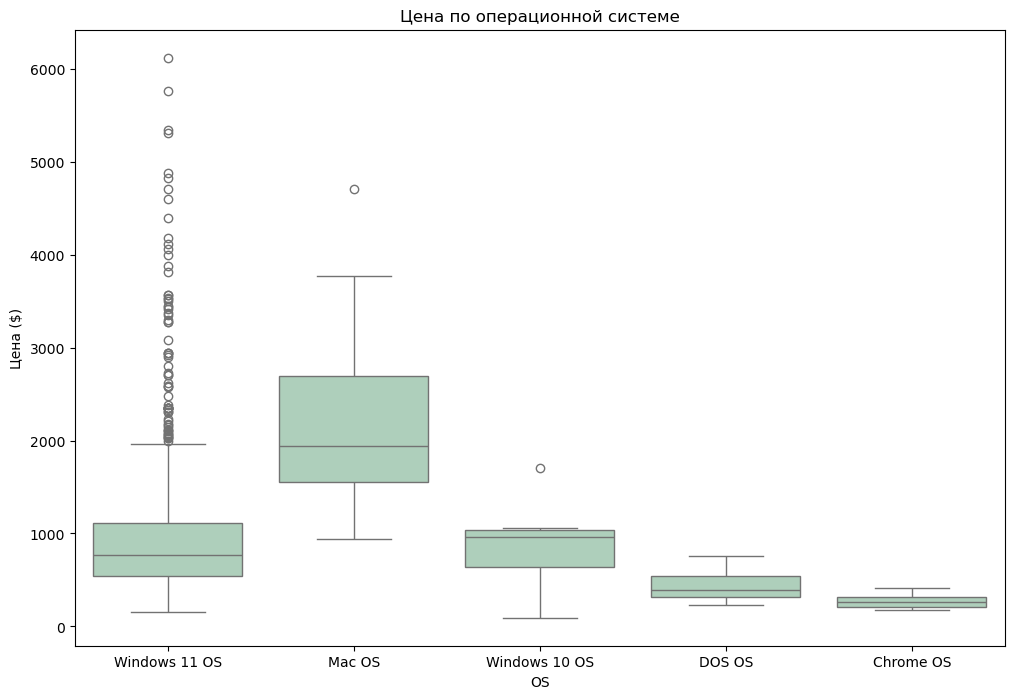

In [125]:
#Цена по операционной системе
top_os = df['OS'].value_counts().head(5).index
filtered_df = df[df['OS'].isin(top_os)]
plt.figure(figsize=(12,8))
plt.title('Цена по операционной системе')
sns.boxplot(x='OS', y='Price', data=filtered_df,color='#A8D5BA')
plt.ylabel('Цена ($)')
plt.show()

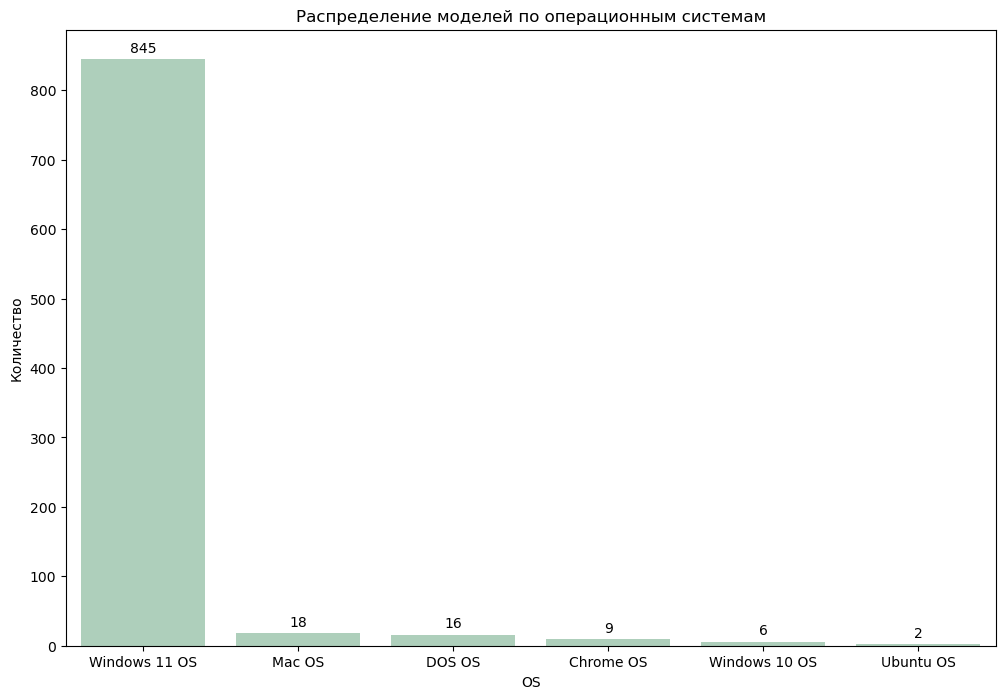

In [126]:
#Распределение моделей по операционным системам
os = df['OS'].value_counts().reset_index().sort_values(by='count',ascending=False).head(6)
plt.figure(figsize=(12,8))
plt.title('Распределение моделей по операционным системам')
sns.barplot(data=os,x='OS',y='count',color='#A8D5BA')
for index,value in enumerate(os['count']):
    plt.text(index, value + 10, str(value), ha='center')
plt.ylabel('Количество')
plt.show()

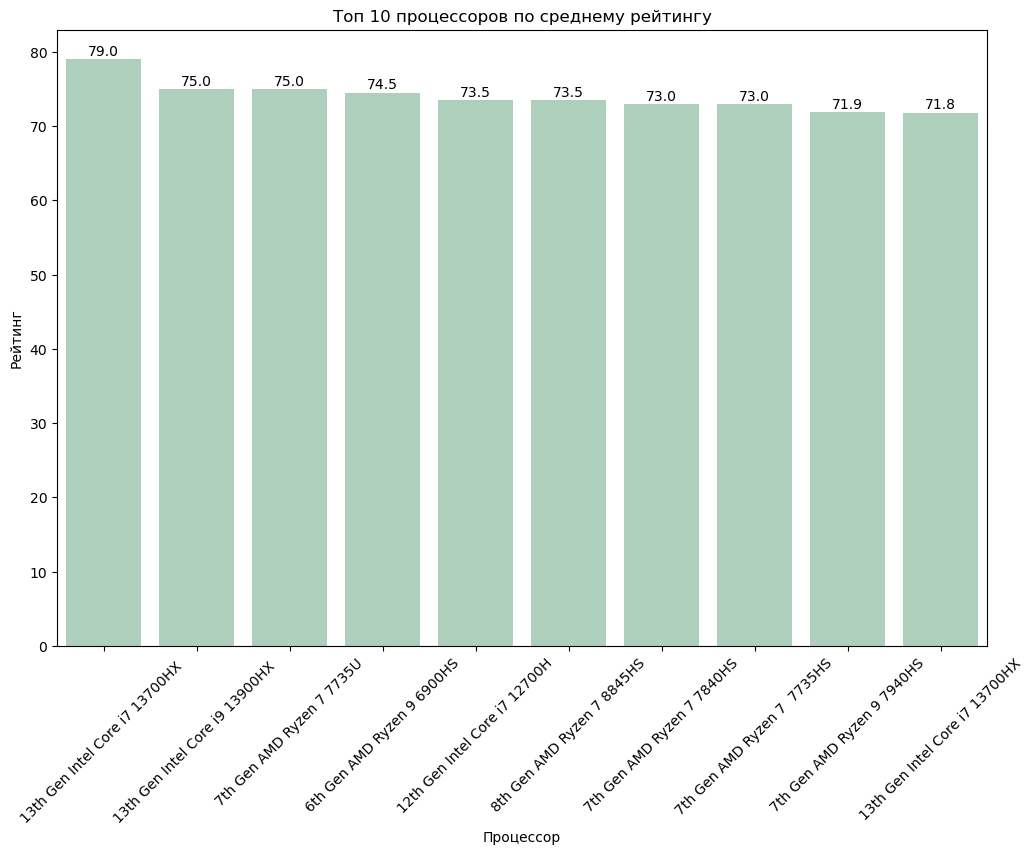

In [127]:
#Топ 10 процессоров по рейтингу ноутбука
top_cpu = df.groupby('CPU')['Rating'].mean().round(1).sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,8))
plt.title('Топ 10 процессоров по среднему рейтингу')
sns.barplot(data=top_cpu,x='CPU',y='Rating',color='#A8D5BA')
plt.xlabel('Процессор')
plt.ylabel('Рейтинг')
plt.xticks(rotation=45)
for index,value in enumerate(top_cpu['Rating']):
    plt.text(index,value+0.5,str(value),ha='center')
plt.show()

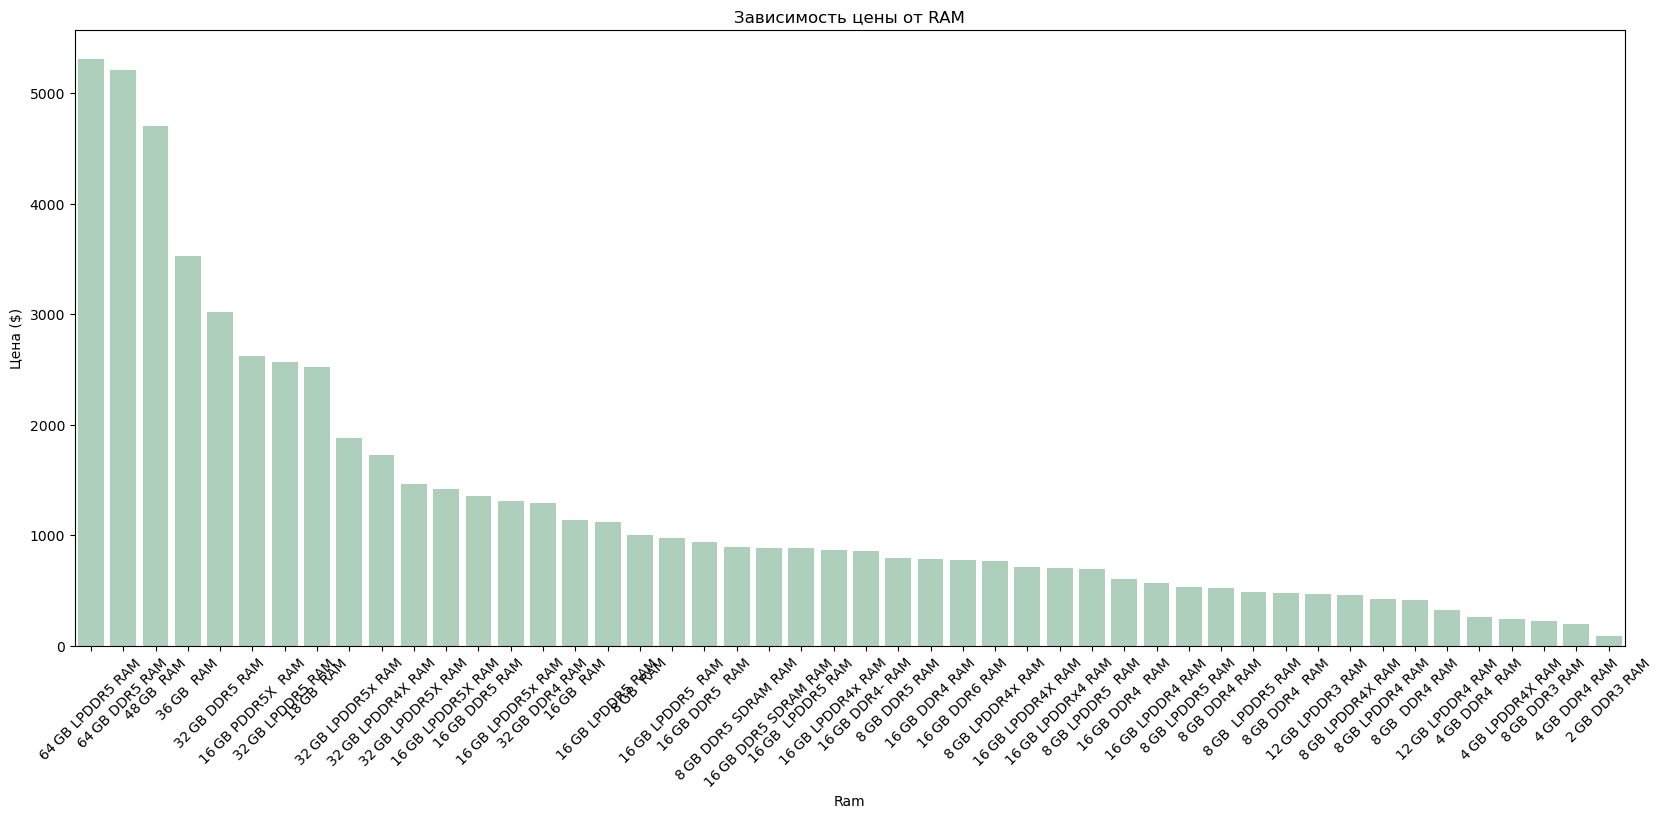

In [128]:
#Зависимость цены ноутбука от оперативной памяти
avg_ram = df.groupby('Ram')['Price'].mean().round(0).sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,8))
plt.title('Зависимость цены от RAM')
sns.barplot(data=avg_ram,x='Ram',y='Price',color='#A8D5BA')
plt.ylabel('Цена ($)')
plt.xticks(rotation=45)
plt.show()

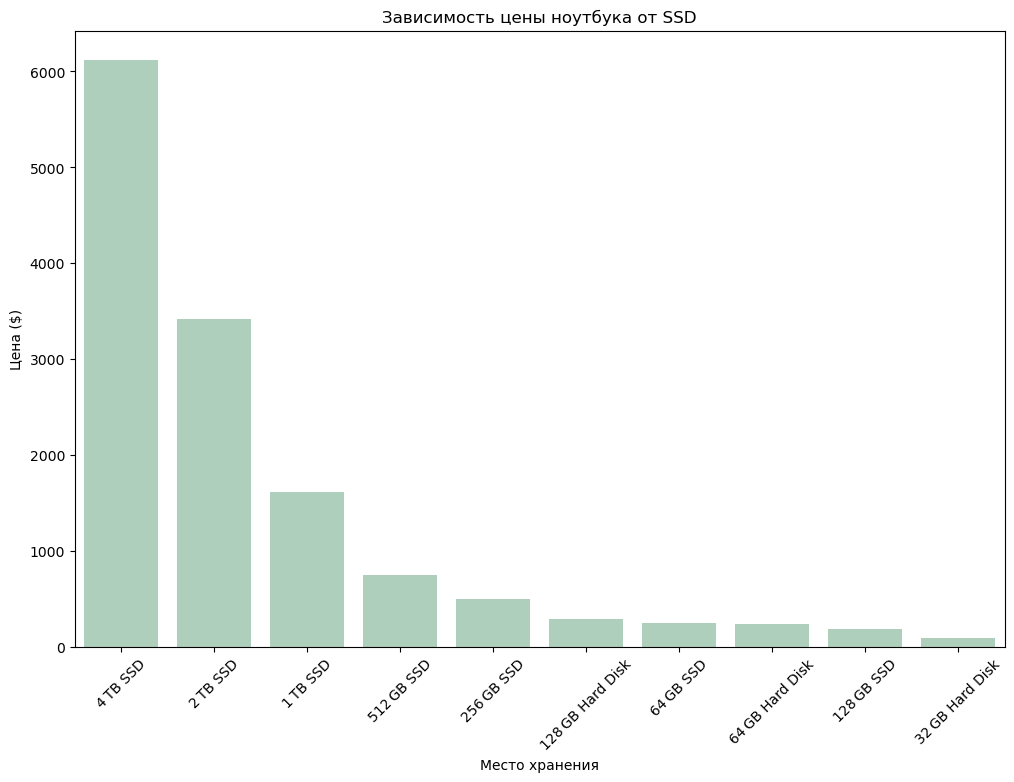

In [129]:
#Зависимость цены ноутбука от SSD/HDD
avg_ssd = df.groupby('SSD')['Price'].mean().round(2).sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
plt.title('Зависимость цены ноутбука от SSD')
sns.barplot(data=avg_ssd,x='SSD',y='Price',color='#A8D5BA')
plt.xlabel('Место хранения')
plt.xticks(rotation=45)
plt.ylabel('Цена ($)')
plt.show()

In [130]:
#Создадим новые колокни
df[['Screen_Size','Screen_Resolution']] = df['Display'].str.split(',',n=1,expand=True)

In [131]:
df['Screen_Size'] = df['Screen_Size'].str.strip()
df['Screen_Size'] = df['Screen_Size'].str.replace('inches', '', regex=False).str.strip()
df['Screen_Resolution'] = df['Screen_Resolution'].str.strip()
df['Screen_Resolution'] = df['Display'].str.extract(r'(\d{3,4}\s*[×xX*]\s*\d{3,4})')

In [132]:
df['Screen_Size'].value_counts()

Screen_Size
15.6     436
14       208
16       128
16.1      25
13.3      22
17.3      20
17        10
14.1       8
11.6       6
14.2       6
15.3       5
13.5       4
16.2       4
13.4       3
13.6       3
15         2
12.4       2
15.75      1
12         1
14.5       1
18         1
Name: count, dtype: int64

In [133]:
df['Screen_Resolution'].value_counts()

Screen_Resolution
1920 x 1080    541
1920 x 1200    133
2560 x 1600     59
1366 x 768      41
2880 x 1800     39
2560 x 1440     11
3840 x 2400     11
1080 x 1920      7
3200 x 2000      6
3024 x 1964      5
2880 x 1864      5
3456 x 2234      4
3200 x 1800      3
1200 x 1920      3
2560 x 1664      3
3456 x 2160      2
2160 x 1440      2
1536 x 1024      2
1600 x 2560      2
2240 x 1400      2
3000 x 2000      2
2561 x 1600      1
2880 x 1620      1
2048 x 1536      1
2520 x 1680      1
1366 x 720       1
3840 x 2160      1
1280 x 1024      1
1920 x 2560      1
1920 x 1280      1
3072 x 1920      1
1440 x 2560      1
2256 x 1504      1
Name: count, dtype: int64

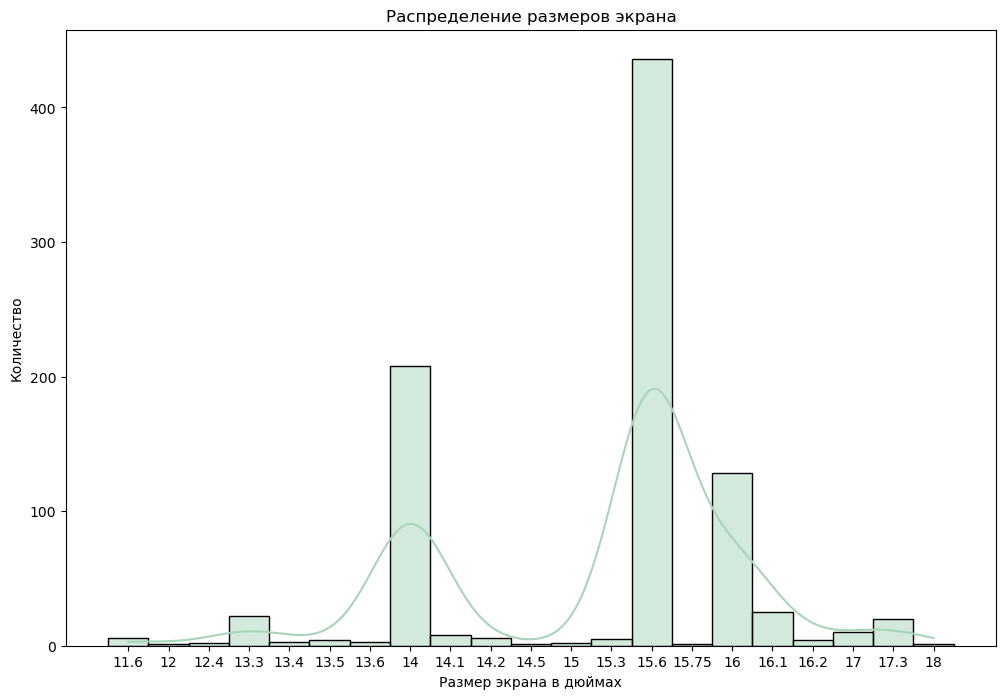

In [134]:
#Распределение размеров экрана
plt.figure(figsize=(12,8))
plt.title('Распределение размеров экрана')
sns.histplot(df['Screen_Size'].sort_values(ascending=True), bins=10, kde=True,color='#A8D5BA')
plt.xlabel('Размер экрана в дюймах')
plt.ylabel('Количество')
plt.show()

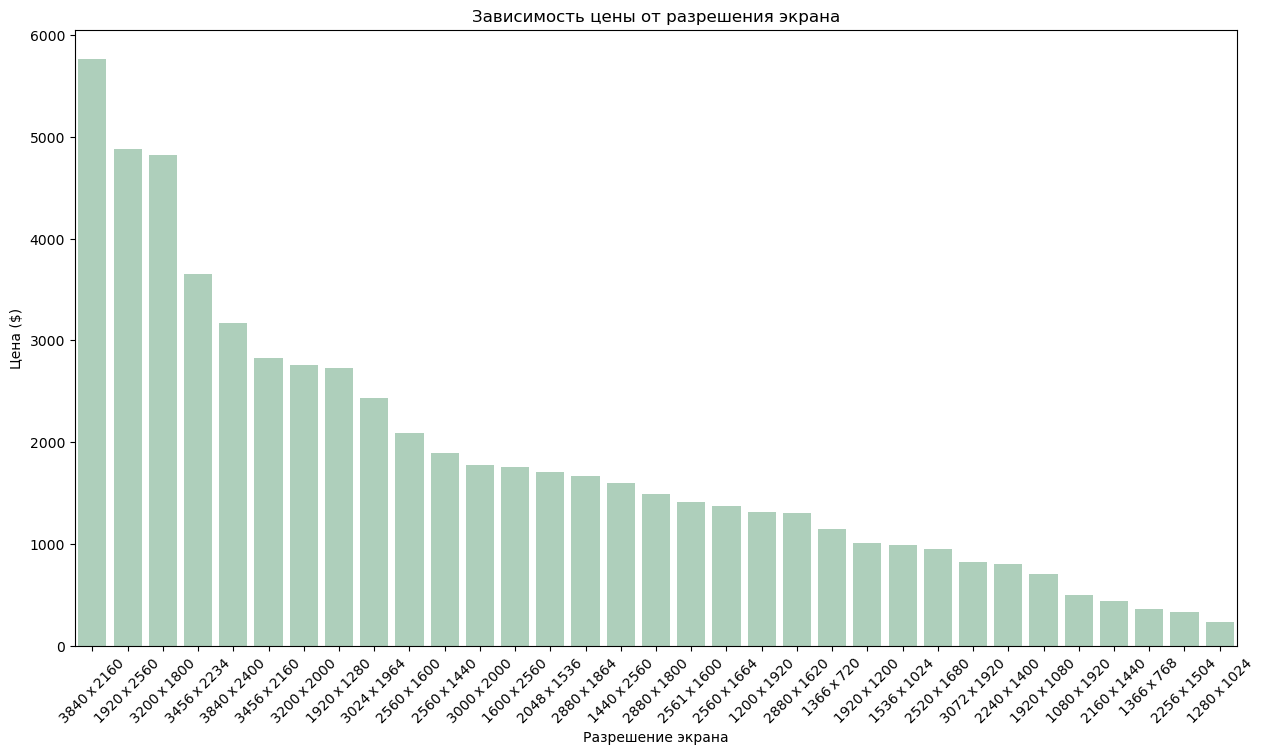

In [135]:
#Зависимость цены от разрешения экрана
res = df.groupby('Screen_Resolution')['Price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,8))
plt.title('Зависимость цены от разрешения экрана')
sns.barplot(data=res,x='Screen_Resolution',y='Price',color='#A8D5BA')
plt.xlabel('Разрешение экрана')
plt.ylabel('Цена ($)')
plt.xticks(rotation=45)
plt.show()

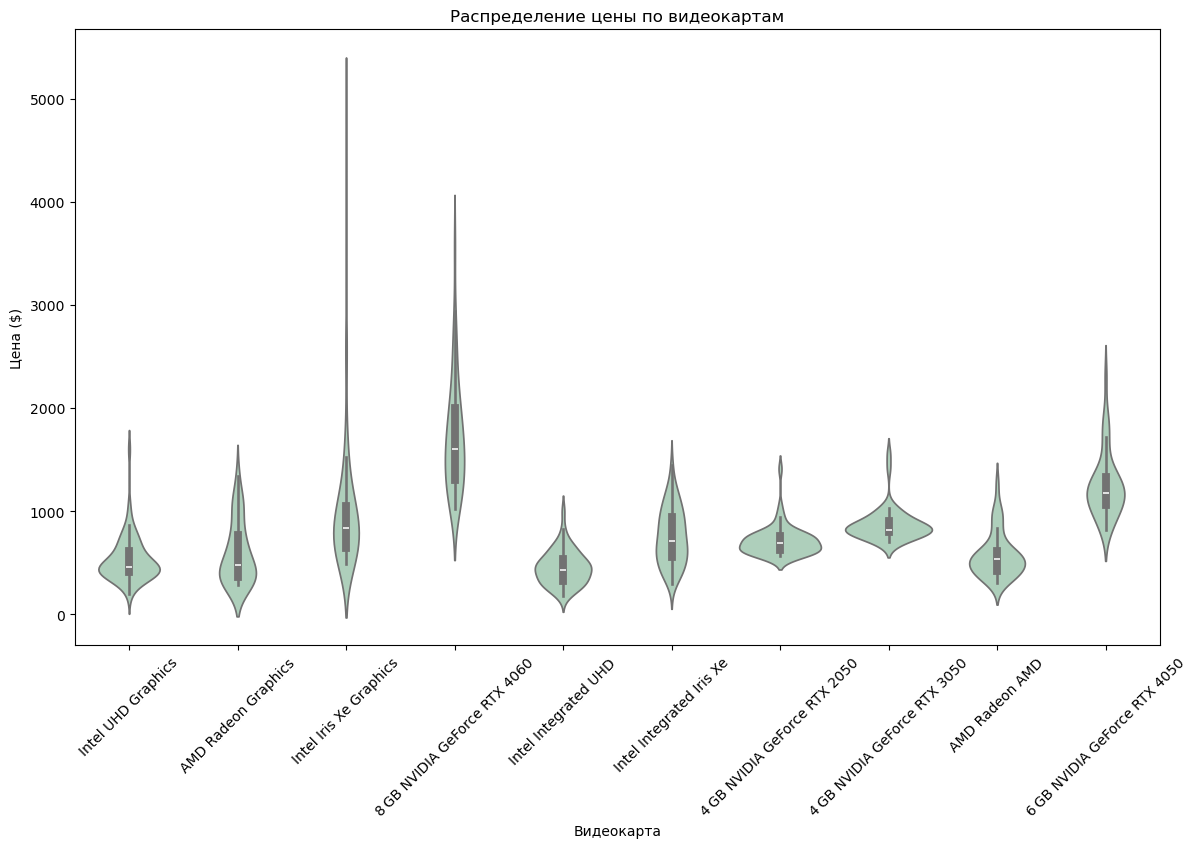

In [136]:
#Топ 15 самых популярных видеокарт
gpu = df['Graphics'].value_counts().head(10).index
top_gpu = df[df['Graphics'].isin(gpu)]
plt.figure(figsize=(14, 8))
plt.title('Распределение цены по видеокартам')
sns.violinplot(data=top_gpu,x='Graphics', y='Price',color='#A8D5BA')
plt.xlabel('Видеокарта')
plt.ylabel('Цена ($)')
plt.xticks(rotation=45)
plt.show()

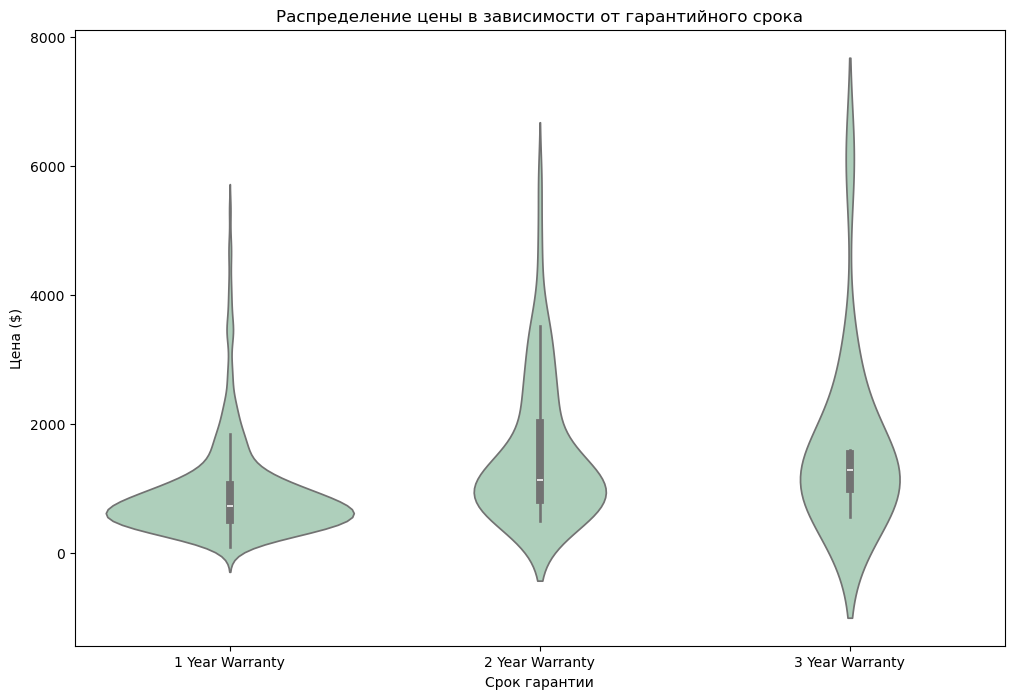

In [137]:
#Распределение цены в зависимости от гарантийного срока
plt.figure(figsize=(12,8))
plt.title('Распределение цены в зависимости от гарантийного срока')
sns.violinplot(data=df,x='Warranty',y='Price',color='#A8D5BA')
plt.xlabel('Срок гарантии')
plt.ylabel('Цена ($)')
plt.show()

In [138]:
df['Warranty_int'] = df['Warranty'].str.split(' ', n=1).str[0].astype('int64')
df['Screen_Size'] = df['Screen_Size'].astype('float64')
df['SSD_int'] = df['SSD'].str.extract('(\d+)', expand=False).astype('int64')
df['Ram_int'] = df['Ram'].str.extract(r'(\d+)', expand=False).astype('int64')

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sergo\AppData\Local\Temp\ipykernel_1684\1348448260.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['SSD_int'] = df['SSD'].str.extract('(\d+)', expand=False).astype('int64')


In [139]:
df['SSD_int'].value_counts()

SSD_int
512    611
1      215
256     36
2       17
128     11
64       4
32       1
4        1
Name: count, dtype: int64

In [140]:
df['SSD_int'] = df['SSD_int'].replace({1:1024, 2:2048, 4:4096})

In [141]:
df['SSD_int'].value_counts()

SSD_int
512     611
1024    215
256      36
2048     17
128      11
64        4
32        1
4096      1
Name: count, dtype: int64

In [142]:
corr = df[['Price','Rating','Ram_int','SSD_int','Screen_Size','Warranty_int']].corr()

In [143]:
corr

,Price,Rating,Ram_int,SSD_int,Screen_Size,Warranty_int
Price,1.000000,0.338045,0.778380,0.676984,0.255177,0.224803
Rating,0.338045,1.000000,0.306974,0.258821,0.188130,0.159288
Ram_int,0.778380,0.306974,1.000000,0.661460,0.216133,0.234803
SSD_int,0.676984,0.258821,0.661460,1.000000,0.249245,0.224153
Screen_Size,0.255177,0.188130,0.216133,0.249245,1.000000,0.029946
Warranty_int,0.224803,0.159288,0.234803,0.224153,0.029946,1.000000


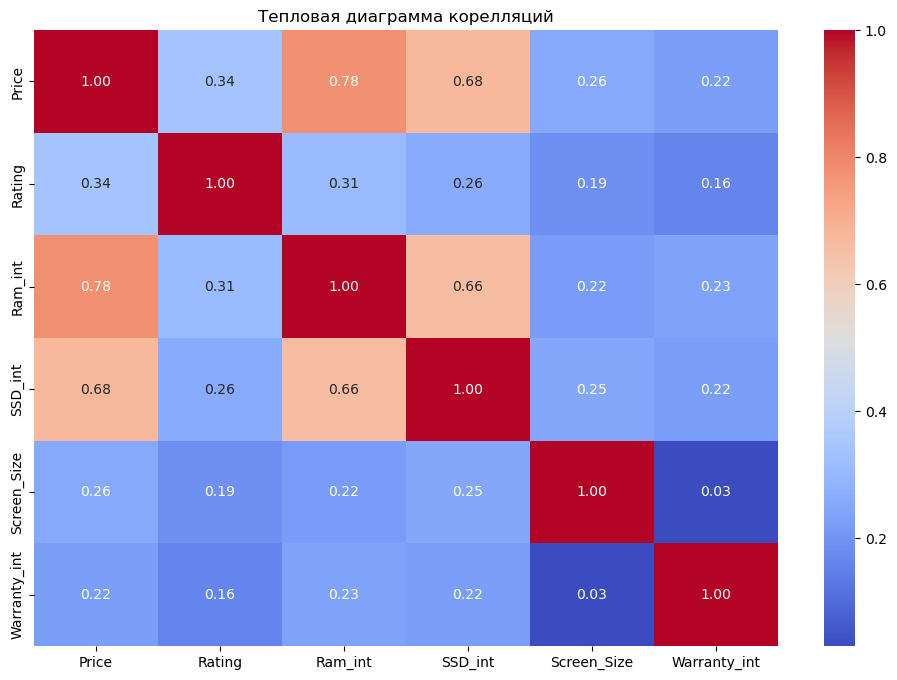

In [144]:
plt.figure(figsize=(12,8))
plt.title('Тепловая диаграмма корелляций')
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [145]:
df['Graphics'].value_counts()

Graphics
Intel Iris Xe Graphics                             80
Intel UHD Graphics                                 65
Intel Integrated Iris Xe                           60
Intel Integrated UHD                               53
4 GB NVIDIA GeForce RTX 2050                       53
                                                   ..
8 GB NVIDIA GeForce RTX A2000 Ada                   1
Intel Integrated UHD 600                            1
Intel Integrated Integrated Intel® UHD Graphics     1
NVIDIA Geforce RTX                                  1
4 GB AMD Radeon RX6500M                             1
Name: count, Length: 132, dtype: int64

In [146]:
df['GPU_type'] = df['Graphics'].apply(lambda x: 'integrated' if 'integrated' in x.lower() or 'graphics' in x.lower() else 'dedicated')

In [147]:
df['GPU_type'].value_counts()

GPU_type
integrated    477
dedicated     419
Name: count, dtype: int64

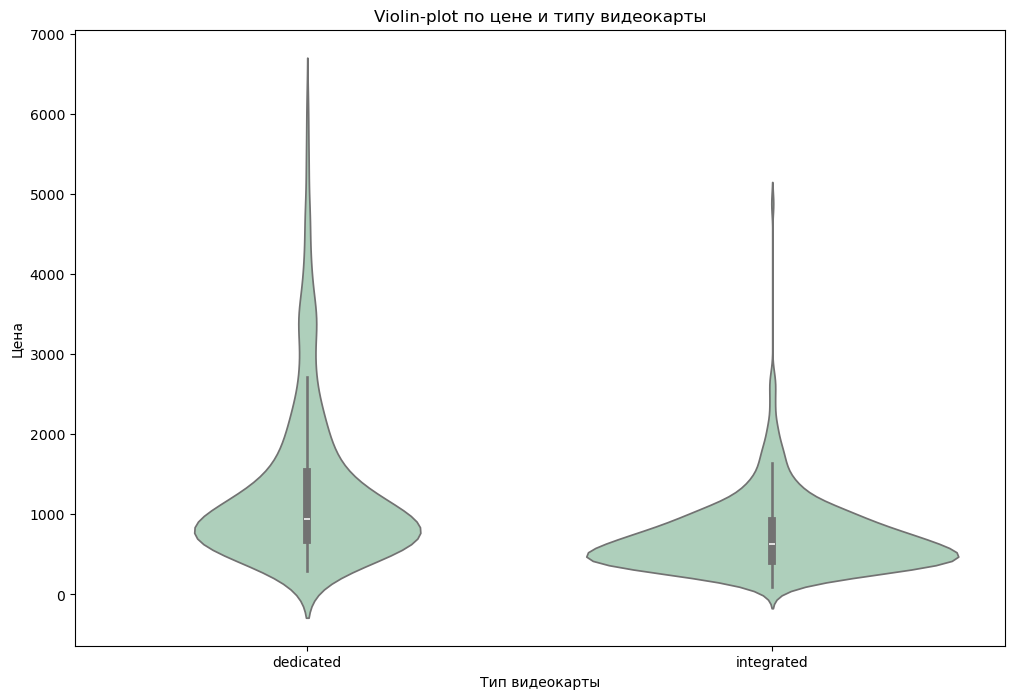

In [148]:
#Гипотеза 1
#H0 (нулевая): Тип видеокарты не влияет на цену ноутбука.
#H1 (альтернативная): Ноутбуки с дискретной графикой имеют более высокую цену, чем с интегрированной.
plt.figure(figsize=(12,8))
plt.title('Violin-plot по цене и типу видеокарты')
sns.violinplot(data=df,x='GPU_type',y='Price',color='#A8D5BA')
plt.xlabel('Тип видеокарты')
plt.ylabel('Цена')
plt.show()

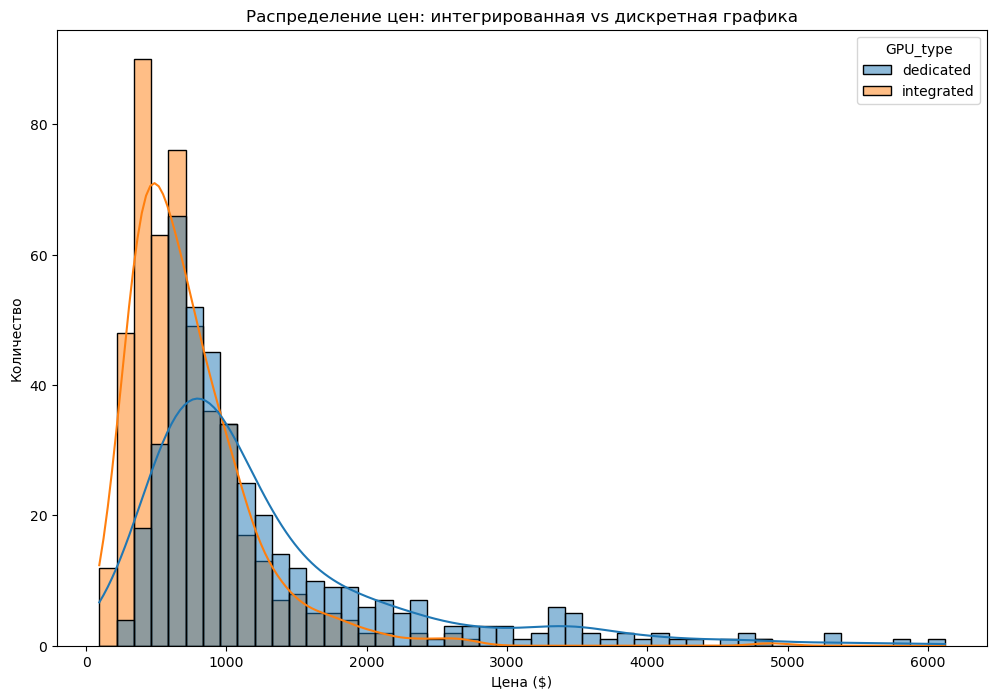

In [149]:
plt.figure(figsize=(12,8))
plt.title('Распределение цен: интегрированная vs дискретная графика')
sns.histplot(data=df,x='Price',hue='GPU_type',kde=True)
plt.xlabel('Цена ($)')
plt.ylabel('Количество')
plt.show()

In [150]:
for gpu_type in df['GPU_type'].unique():
    stat, p = stats.shapiro(df[df['GPU_type'] == gpu_type]['Price'])
    print(f'{gpu_type} - p-value:', p)

dedicated - p-value: 2.51134675133753e-24
integrated - p-value: 1.2840481778358979e-23


In [151]:
price_integrated = df[df['GPU_type']=='integrated']['Price']
price_dedicated = df[df['GPU_type']=='dedicated']['Price']
stat, p = stats.mannwhitneyu(price_integrated, price_dedicated, alternative='two-sided')
print('Mann–Whitney U-test:')
print('p-value:', p)
# Цены ноутбуков с разными типами видеокарт статистически различаются.Ноутбуки с дискретной графикой действительно стоят дороже, чем с интегрированной.

Mann–Whitney U-test:
p-value: 6.125896468784756e-33


In [152]:
#Гипотеза 2
#H0 (нулевая): Цена ноутбуков с процессорами 13th Gen Intel Core i7 13700H и 7th Gen AMD Ryzen 7 7840HS одинакова.
#H1 (альтернативная): Цена ноутбуков с данными процессорами различается.
intel_cpu = df[df['CPU']=='13th Gen Intel Core i7 13700H']
amd_cpu = df[df['CPU']=='7th Gen AMD Ryzen 7 7840HS']
stat_i, p_i = stats.shapiro(intel_cpu['Price'])
print(f'Intel (I7 13700H) - p-value: {p_i:.5f}')
stat_a,p_a = stats.shapiro(amd_cpu['Price'])
print(f'AMD (Ryzen 7 7840HS) - p_value: {p_a:.5f}')
#Распределение группы Intel не является нормальным, AMD -нормальное распределение. Все равно будем использовать тест Манна-Уитни.

Intel (I7 13700H) - p-value: 0.00100
AMD (Ryzen 7 7840HS) - p_value: 0.09712


In [153]:
stat, p = stats.mannwhitneyu(intel_cpu['Price'],amd_cpu['Price'],alternative='two-sided')
print('Mann–Whitney U-test:')
print('p_value:',p)
#Статистически значимых различий в цене нету, не отвергаем H0.

Mann–Whitney U-test:
p_value: 0.7738492609341964


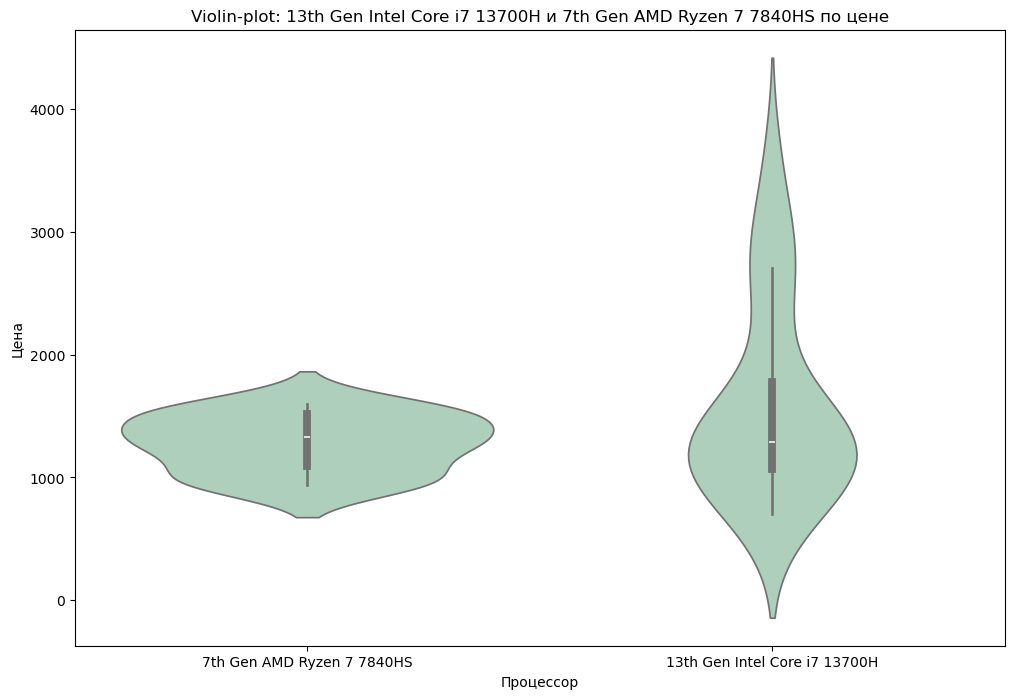

In [154]:
cpus = df[(df['CPU']=='13th Gen Intel Core i7 13700H') | (df['CPU']=='7th Gen AMD Ryzen 7 7840HS')]
plt.figure(figsize=(12,8))
plt.title('Violin-plot: 13th Gen Intel Core i7 13700H и 7th Gen AMD Ryzen 7 7840HS по цене')
sns.violinplot(data=cpus, x='CPU',y='Price',color='#A8D5BA')
plt.xlabel('Процессор')
plt.ylabel('Цена')
plt.show()

In [155]:
df.head()

,Model,Price,Rating,CPU,Cores,Ram,SSD,Display,Graphics,OS,Warranty,Brand,Screen_Size,Screen_Resolution,Warranty_int,SSD_int,Ram_int,GPU_type
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,593.0,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,HP,15.6,1920 x 1080,1,512,8,dedicated
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,282.0,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,Tecno,15.6,1920 x 1080,1,512,8,integrated
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,318.0,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,Lenovo,15.6,1920 x 1080,1,512,8,integrated
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,823.0,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,Samsung,13.3,1080 x 1920,1,512,16,integrated
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1212.0,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,Xiaomi,16.1,2560 x 1600,1,1024,16,dedicated


In [156]:
#Удалим неразрывные узкие пробелы - \u2009
df['Screen_Resolution'] = df['Screen_Resolution'].str.replace('\u2009', ' ')

In [157]:
df['Screen_Resolution'].unique()

array(['1920 x 1080', '1080 x 1920', '2560 x 1600', '2560 x 1664',
       '1920 x 1200', '2880 x 1800', '1366 x 768', '2560 x 1440',
       '3000 x 2000', '1440 x 2560', '3456 x 2234', '2880 x 1864',
       '3072 x 1920', '3200 x 2000', '3024 x 1964', '2240 x 1400',
       '2256 x 1504', '3840 x 2160', '2880 x 1620', '2561 x 1600',
       '2160 x 1440', '2048 x 1536', '2520 x 1680', '1366 x 720',
       '1536 x 1024', '1280 x 1024', '1920 x 2560', '3840 x 2400',
       '1920 x 1280', '3456 x 2160', '3200 x 1800', '1200 x 1920', nan,
       '1600 x 2560'], dtype=object)

In [158]:
df[df['Screen_Resolution'].isnull()]

,Model,Price,Rating,CPU,Cores,Ram,SSD,Display,Graphics,OS,Warranty,Brand,Screen_Size,Screen_Resolution,Warranty_int,SSD_int,Ram_int,GPU_type
709,HP ZBook Studio G9 WUXGA 16 Workstation Laptop...,4390.0,61.75651,12th Gen Intel Core i9 12900H,"14 Cores (6P + 8E), 20 Threads",32 GB DDR5 RAM,1 TB SSD,16 inches,16 GB NVIDIA GeForce RTX 3080 Ti,Windows 11 OS,1 Year Warranty,HP,16.0,NaN,1,1024,32,dedicated


In [159]:
df['Screen_Resolution'] = df['Screen_Resolution'].fillna('3840 x 2400')

In [160]:
#Классификация разршений
def classification_res(res):
    if res in ['1366 x 768', '1366 x 720', '1280 x 1024', '1536 x 1024']:
        return 'HD'
    elif res in ['1920 x 1080', '1080 x 1920', '1920 x 1200', '1920 x 1280','1200 x 1920']:
        return 'Full HD'
    elif res in ['2560 x 1440', '1440 x 2560', '2560 x 1600', '2560 x 1664', '2561 x 1600',
                 '2160 x 1440', '2240 x 1400', '2256 x 1504', '2048 x 1536', '2520 x 1680', '1920 x 2560','1600 x 2560']:
        return '2K/QHD'
    elif res in ['2880 x 1800', '2880 x 1864', '2880 x 1620', '3000 x 2000',
                 '3024 x 1964', '3072 x 1920', '3200 x 1800', '3200 x 2000',
                 '3456 x 2160', '3456 x 2234']:
        return '3K+'
    elif res in ['3840 x 2160', '3840 x 2400']:
        return '4K'
    
df['Resolution'] = df['Screen_Resolution'].apply(classification_res)

In [161]:
df['Resolution'].value_counts()

Resolution
Full HD    685
2K/QHD      85
3K+         68
HD          45
4K          13
Name: count, dtype: int64

In [162]:
#Гипотеза 3
#H0: Средняя цена одинакова при любом разрешении
#H1: Цена различается
for res in df['Resolution'].unique():
    stat, p = stats.shapiro(df[df['Resolution']==res]['Price'])
    print(f'{res} - p_value:',p)

Full HD - p_value: 1.241951369008703e-24
2K/QHD - p_value: 3.842917700005414e-06
3K+ - p_value: 6.087816217788531e-06
HD - p_value: 3.512085007825684e-07
4K - p_value: 0.9569673045099901


In [163]:
groups = []
for res in df['Resolution'].unique():
    group_prices = df[df['Resolution'] == res]['Price']
    groups.append(group_prices)
stat, p = stats.kruskal(*groups)
print(f'Kruskal-Wallis test: statistic={stat:.4f}, p-value={p:.5f}')
#Отвергаем H0, есть различия в цене.

Kruskal-Wallis test: statistic=326.3969, p-value=0.00000


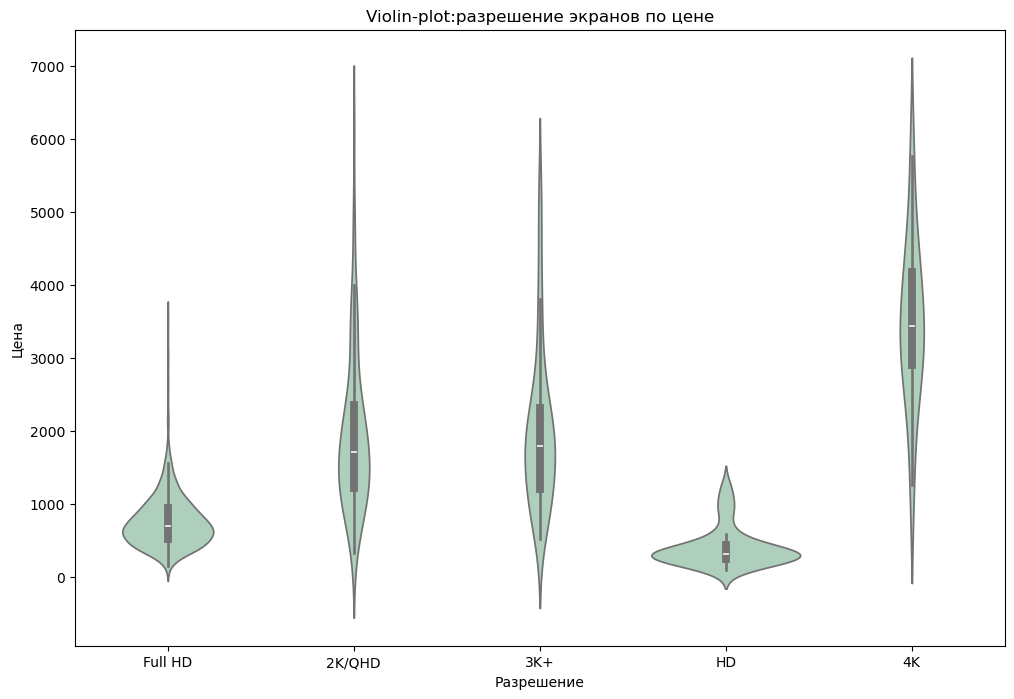

In [164]:
plt.figure(figsize=(12,8))
plt.title('Violin-plot:разрешение экранов по цене')
sns.violinplot(data=df,x='Resolution',y='Price',color='#A8D5BA')
plt.xlabel('Разрешение')
plt.ylabel('Цена')
plt.show()

In [165]:
#Гипотеза 4:Средняя цена ноутбуков с рейтингом выше 70 отличается от остальных
#H0 Нет различий
#H1 Более высокорейтинговые ноутбуки стоят иначе

In [166]:
high_rating = df[df['Rating'] >= 70.0]
low_rating = df[df['Rating'] <= 70.0]

In [167]:
stat_h,p_h = stats.shapiro(high_rating['Price'])
stat_l,p_l = stats.shapiro(low_rating['Price'])
print(f'high_rating - p_value:{p_h:.5f}')
print(f'low_rating - p_value:{p_l:.5f}')

high_rating - p_value:0.00015
low_rating - p_value:0.00000


In [168]:
stat,p = stats.mannwhitneyu(high_rating['Price'],low_rating['Price'],alternative='two-sided')
print('Mann–Whitney U-test:')
print(f'p-value:',p)
#Статистически значимые различия имеются, отвергаем H0

Mann–Whitney U-test:
p-value: 5.411303842312321e-33


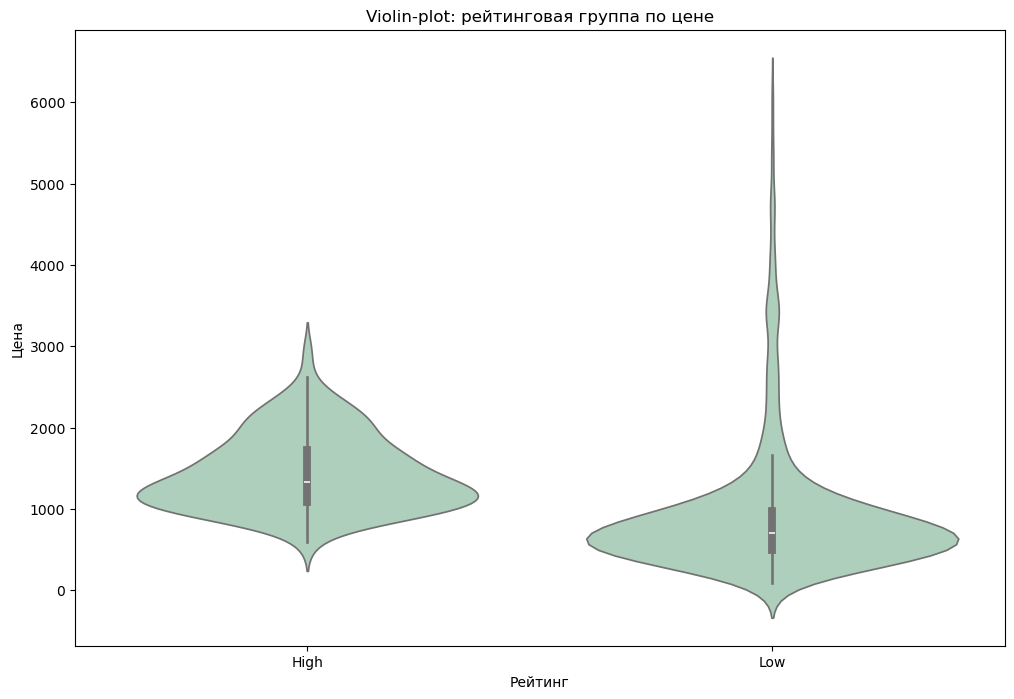

In [169]:
df['Rating_group'] = df['Rating'].apply(lambda x: 'High' if x>=70.0 else 'Low')
plt.figure(figsize=(12,8))
plt.title('Violin-plot: рейтинговая группа по цене')
sns.violinplot(data=df,x='Rating_group',y='Price',color='#A8D5BA')
plt.xlabel('Рейтинг')
plt.ylabel('Цена')
plt.show()

In [170]:
df.head()

,Model,Price,Rating,CPU,Cores,Ram,SSD,Display,Graphics,OS,Warranty,Brand,Screen_Size,Screen_Resolution,Warranty_int,SSD_int,Ram_int,GPU_type,Resolution,Rating_group
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,593.0,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,HP,15.6,1920 x 1080,1,512,8,dedicated,Full HD,High
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,282.0,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,Tecno,15.6,1920 x 1080,1,512,8,integrated,Full HD,Low
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,318.0,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,Lenovo,15.6,1920 x 1080,1,512,8,integrated,Full HD,Low
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,823.0,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,Samsung,13.3,1080 x 1920,1,512,16,integrated,Full HD,Low
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1212.0,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,Xiaomi,16.1,2560 x 1600,1,1024,16,dedicated,2K/QHD,High


In [171]:
#Гипотеза 5 Видеокарты NVIDIA стоят дороже, чем Intel/AMD/Apple
#H0 Все типы GPU стоят одинаково
#H1 NVIDIA модели дороже
df['GPU_brand'] = df['Graphics'].apply(lambda x: 'Intel' if 'intel' in x.lower() 
                                  else 'AMD' if 'amd' in x.lower() 
                                  else 'Nvidia' if 'nvidia' in x.lower() 
                                  else 'Mali' if 'arm mali' in x.lower()
                                  else 'Apple')

In [173]:
df['GPU_brand'].value_counts()

GPU_brand
Intel     425
Nvidia    322
AMD       127
Apple      19
Mali        3
Name: count, dtype: int64

In [174]:
df_gpu = df[df['GPU_brand'].isin(['Intel','AMD','Nvidia'])]

In [180]:
for br in df_gpu['GPU_brand'].unique():
    stat, p = stats.shapiro(df_gpu[df_gpu['GPU_brand']==br]['Price'])
    print(f'{br} - p_value:{p:.6f}')

AMD - p_value:0.000003
Intel - p_value:0.000000
Nvidia - p_value:0.000000


In [187]:
groups = []
for br in df_gpu['GPU_brand'].unique():
    gpus = df_gpu[df_gpu['GPU_brand']==br]['Price']
    groups.append(gpus)
stat,p = stats.kruskal(*groups)
print(f'Kruskal-Wallis test: statistic={stat:.4f},p_value={p:.5f}')
#Отвергаем H0

Kruskal-Wallis test: statistic=239.7539,p_value=0.00000


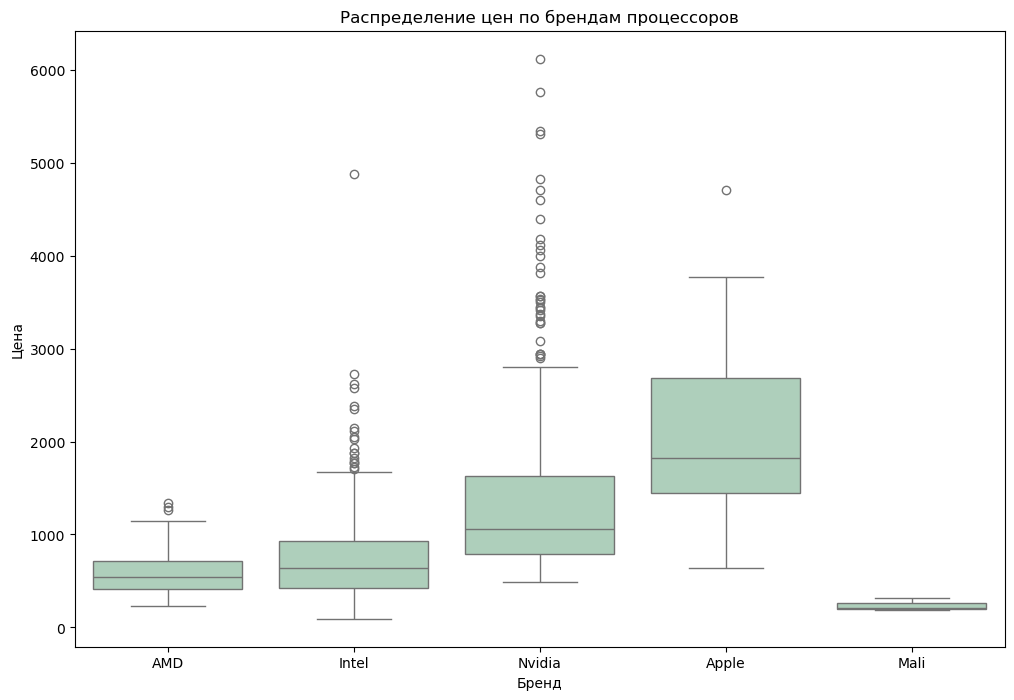

In [210]:
plt.figure(figsize=(12,8))
plt.title('Распределение цен по брендам процессоров')
sns.boxplot(data=df,x='GPU_brand',y='Price',color='#A8D5BA')
plt.xlabel('Бренд')
plt.ylabel('Цена')
plt.show()

In [195]:
gpus = df['GPU_brand'].value_counts().reset_index()

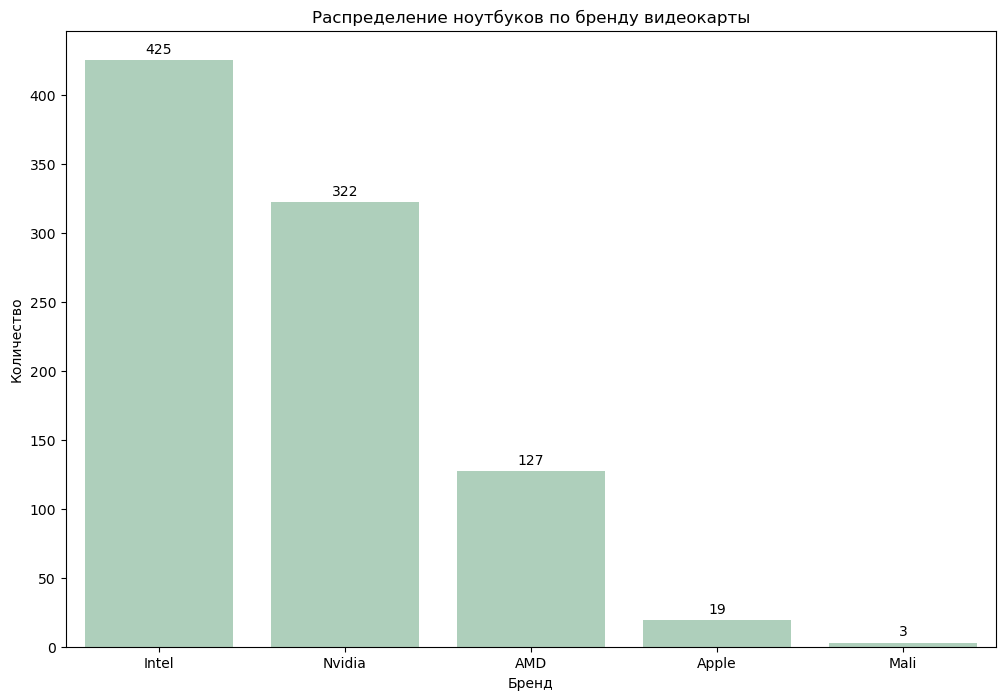

In [206]:
plt.figure(figsize=(12,8))
plt.title('Распределение ноутбуков по бренду видеокарты')
sns.barplot(data=gpus,x='GPU_brand',y='count',color='#A8D5BA')
plt.xlabel('Бренд')
plt.ylabel('Количество')
for index, value in enumerate(gpus['count']):
    plt.text(index, value+5 , str(value), ha='center')
plt.show()